# Description

## Context

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## Content

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

## Problem approach

This problem can be considered as a Classification or Regression problem.Our approach is to solve it as an Multiple Classification problem.

We have considered 'Rating' as the Target variable. The main objective is to predict the Women's clothing rating based on the customer reviews.

#### Load the required libraries

In [58]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model

from IPython.display import Image

#### Constants declaration

In [59]:
EMBEDDING_DIM = 50
EPOCHS =10
VALIDATION_SPLIT = 0.2

#### Set the working directory

In [60]:
os.chdir('/Users/kalpakullachandasubbaiah/Desktop/WOMENS FOLDER/womens-ecommerce-clothing-reviews')

#### Read the data

In [61]:
data= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

### Understand the data

In [62]:
data.shape

(23486, 11)

In [63]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [64]:
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [65]:
data.describe(include='all')

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,11742.500000,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,6779.968547,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5871.250000,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,11742.500000,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,17613.750000,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#### Remove the columns Unnamed:0 and Title

In [67]:
data=data.drop(labels=['Unnamed: 0','Title'], axis=1)

In [68]:
data.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### Identify the unique values for each of the attributes

In [69]:
for i in data.columns.values:
    if i in 'Review Text':
        continue
    print (i)
    print (pd.value_counts(data[i].values))

Clothing ID
1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
836      205
1022     205
        ... 
88         1
72         1
56         1
1191       1
1175       1
1183       1
1127       1
887        1
600        1
648        1
680        1
712        1
137        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
0          1
Length: 1206, dtype: int64
Age
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579

#### Verify missing value 

In [70]:
data.isnull().sum()

Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

#### Missing value imputation

In [71]:
data = data.dropna()
data.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#### Change the data types accordingly

In [72]:
numerical = ['Age','Positive Feedback Count']
categorical =['Rating','Recommended IND','Division Name','Department Name','Class Name']
string = 'Review Text'

In [73]:
for num in numerical:
    data[num] = pd.to_numeric(data[num])
    
for cat in categorical:
    data[cat] = data[cat].astype('category')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Review Text                22628 non-null object
Rating                     22628 non-null category
Recommended IND            22628 non-null category
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null category
Department Name            22628 non-null category
Class Name                 22628 non-null category
dtypes: category(5), int64(3), object(1)
memory usage: 995.8+ KB


#### Attribute Clothing ID is not treated as a continuous variable since the values are repeating
Since there are 1172 different values in 'Clothing ID' dummyfying it will cause sparser matrix (having many 0's)

Therefore we are choosing to use categorical embedding

In [75]:
clothing_id_levels = np.size(np.unique(data['Clothing ID'], return_counts=True)[0])
clothing_id_levels

1172

In [76]:
clothing_id_ind_attr = data['Clothing ID'].values

In [77]:
clothing_id_ind_attr.shape


(22628,)

In [78]:
clothing_id_input = Input(shape=(1, ), name="Clothing_ID")
clothing_id_embed = Embedding(input_dim=clothing_id_ind_attr.shape[0], output_dim=EMBEDDING_DIM)(clothing_id_input)
clothing_id_embed_flat = Flatten()(clothing_id_embed)

### Pre-procressing of numerical variables

#### Select numerical independent attributes

In [79]:
numerical_attr = data.select_dtypes('int64').columns
numerical_df = data[numerical_attr]

In [80]:
numerical_df=numerical_df.astype('float')
numerical_df = numerical_df.drop(labels=['Clothing ID'],axis=1)
numerical_df.head()

,Age,Positive Feedback Count
0,33.0,0.0
1,34.0,4.0
2,60.0,0.0
3,50.0,0.0
4,47.0,6.0


#### Min Max Scaling

In [81]:
Scalar= MinMaxScaler()
scaled_attr = Scalar.fit_transform(numerical_df)
scaled_attr

array([[0.18518519, 0.        ],
       [0.19753086, 0.03278689],
       [0.51851852, 0.        ],
       ...,
       [0.16049383, 0.00819672],
       [0.12345679, 0.01639344],
       [0.41975309, 0.18032787]])

### Preprocessing of categorical variables

#### Select categorical attributes

In [82]:
categorical_attr = data.select_dtypes('category').columns
categorical_attr = categorical_attr[categorical_attr != 'Rating']
categorical_attr 

Index(['Recommended IND', 'Division Name', 'Department Name', 'Class Name'], dtype='object')

In [83]:
target_attr = 'Rating'

In [84]:
categorical_df=data[categorical_attr]
categorical_df.head()

,Recommended IND,Division Name,Department Name,Class Name
0,1,Initmates,Intimate,Intimates
1,1,General,Dresses,Dresses
2,0,General,Dresses,Dresses
3,1,General Petite,Bottoms,Pants
4,1,General,Tops,Blouses


#### Convert categorical attributes to numeric

In [85]:
cat_dummies=pd.get_dummies(categorical_df,drop_first=True).values

In [86]:
cat_dummies

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [87]:
cat_dummies.shape

(22628, 27)

#### Convert target attribute to numeric

#### to_categorical(y, num_classes=None)
y: class vector to be converted into a matrix
        (integers from 0 to num_classes) . 

In [88]:
data[[target_attr]]=data[[target_attr]]-1

In [89]:
no_of_levels= len(np.unique(data[target_attr]))
no_of_levels

5

In [90]:
target_dummy= to_categorical(data[target_attr],num_classes=no_of_levels)

In [91]:
target_dummy

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [92]:
target_dummy.shape

(22628, 5)

### Pre-Processing of Text

#### Initialize the variables

#### Get the length of the text having maximum number of occurances

#### Get the unique count of text length 

In [93]:
unique_elements, counts_elements = np.unique(data[string].apply(len),return_counts=True)

In [94]:
unique_elements

array([  9,  11,  12,  13,  14,  15,  16,  17,  18,  20,  21,  22,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [95]:
counts_elements

array([   1,    1,    2,    2,    2,    1,    2,    3,    2,    2,    2,
          1,    5,    5,    3,    4,    5,    2,    4,    5,    2,    6,
          1,    4,    4,    6,    5,    7,    4,    9,    4,    5,    6,
          5,    8,    6,    5,    6,   30,   29,   24,   24,   32,   23,
         24,   20,   26,   20,   21,   23,   23,   22,   28,   23,   35,
         32,   33,   32,   36,   34,   38,   42,   25,   26,   36,   27,
         26,   33,   33,   27,   38,   36,   39,   26,   33,   38,   39,
         32,   44,   37,   34,   36,   42,   35,   33,   33,   41,   32,
         46,   48,   35,   40,   35,   32,   38,   34,   40,   35,   34,
         50,   36,   51,   27,   41,   46,   36,   38,   36,   45,   37,
         45,   45,   46,   46,   49,   37,   39,   46,   41,   49,   56,
         48,   46,   42,   42,   50,   52,   51,   49,   46,   42,   53,
         41,   42,   45,   43,   39,   43,   56,   42,   51,   43,   36,
         64,   35,   47,   66,   38,   46,   53,   

#### We observe that the highest value of count is 3061 and the corresponding text length is 500 , hence we are choosing 500 as the maximum text length 

In [96]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
MAX_SEQUENCE_LENGTH

500

#### Tokenize the words

In [97]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data[string])
sequences = tokenizer.texts_to_sequences(data[string])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
NUM_WORDS = len(word_index)+1
text_seq = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 14846 unique tokens.


###### Load the GloVe word embedding file into memory as a dictionary of word to embedding array.

__Note__: Filter the embedding for the unique words in the training data.

In [98]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


#### Next, create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

#### The result is a matrix of weights only for words we will see during training.

#### Also count the number of words not present in the glove to decide whether we need to train or not

In [99]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((NUM_WORDS,50))
word_not_in_glove_count = 0
word_not_in_glove =[]
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        word_not_in_glove.append(word)
        word_not_in_glove_count = word_not_in_glove_count+1

In [100]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 [ 0.11891     0.15255    -0.082073   ... -0.57511997 -0.26671001
   0.92120999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.11530006 -0.92496002  0.45280999 ... -0.11177    -0.20133001
  -1.06910002]
 [-1.72899997  0.91578001  0.39234    ... -0.43144    -1.00250006
  -0.83530998]]


In [101]:
print(word_not_in_glove)

["it's", "i'm", '\r', "don't", "didn't", "doesn't", "can't", "i've", "wasn't", "5'4", "i'd", "isn't", "5'3", "couldn't", "that's", "5'5", "5'2", "i'll", 'xxs', "5'7", "5'6", "you're", "5'8", "wouldn't", "5'", "they're", 'pilcro', "won't", "5'1", "5'9", "there's", "haven't", '34d', "5'10", "aren't", 'xsp', '36d', '0p', "would've", "you'll", '34dd', '36dd', 'xxsp', '135lbs', '32dd', "weren't", '00p', "retailer's", '120lbs', "it'll", '30dd', '130lbs', "you'd", 'xsmall', 'tshirt', '115lbs', "5'11", '125lbs', 'skinnies', '140lbs', "they'd", 'pxs', "5'0", "could've", "hadn't", "model's", 'armhole', "shouldn't", 'jsut', '145lbs', "what's", "it'd", '110lbs', "they'll", 'cartonnier', "70's", '34ddd', "she's", "5'4''", "should've", "one's", "let's", "6'", '34f', '36ddd', 'deletta', 'heathered', 'bralette', 'skort', '128lbs', "you've", "5'8''", "they've", "here's", 'xspetite', "dind't", 'jeggings', 'colorway', 'pilcros', "year's", '150lbs', "we'll", 'pxxs', "60's", '34g', 'stevies', 'regualr', "m

In [102]:
print(word_not_in_glove_count)

2782


### Build the model

#### Functional API Dense layer for numerical and categorical features

In [103]:
X_train = np.hstack((scaled_attr, cat_dummies))
X_train.shape

(22628, 29)

In [104]:
num_cat_inputs = Input(shape=(X_train.shape[1],),name='num_cat_inputs')
out_num_cat = Dense(64, activation='relu')(num_cat_inputs)

#### Functional API Embedding layer for text feature

#### If there are more than one word in the training data which are not present in Glove then train the embedding layer

In [105]:
text_input= Input(shape=(MAX_SEQUENCE_LENGTH,),name='text_input')
if (word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS,output_dim=EMBEDDING_DIM,weights=[embedding_matrix],trainable=False)(text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS,output_dim=EMBEDDING_DIM,weights=[embedding_matrix],trainable=True)(text_input)
out_text = Flatten()(text_embed)

#### Concatenate both the layers

In [106]:
concatenated = concatenate([clothing_id_embed_flat,out_num_cat, out_text],axis=-1)
X = Dense(8, activation='relu')(concatenated)
final_out = Dense(no_of_levels, activation='softmax')(X)

In [107]:
model = Model(inputs=[clothing_id_input,num_cat_inputs, text_input], outputs=final_out)

In [108]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Clothing_ID (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
text_input (InputLayer)         (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        1131400     Clothing_ID[0][0]                
__________________________________________________________________________________________________
num_cat_inputs (InputLayer)     (None, 29)           0                                            
__________________________________________________________________________________________________
embedding_

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [110]:
model.fit([clothing_id_ind_attr,X_train,
           text_seq], 
          y=target_dummy, 
          epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Train on 18102 samples, validate on 4526 samples
Epoch 1/10
18102/18102 [==============================] - 16s 879us/step - loss: 1.1288 - acc: 0.5536 - val_loss: 0.9701 - val_acc: 0.5829
Epoch 2/10
18102/18102 [==============================] - 15s 833us/step - loss: 0.8663 - acc: 0.6450 - val_loss: 0.9456 - val_acc: 0.5996
Epoch 3/10
18102/18102 [==============================] - 15s 848us/step - loss: 0.7862 - acc: 0.6768 - val_loss: 0.9277 - val_acc: 0.6122
Epoch 4/10
18102/18102 [==============================] - 15s 845us/step - loss: 0.7280 - acc: 0.7006 - val_loss: 0.9300 - val_acc: 0.6032
Epoch 5/10
18102/18102 [==============================] - 15s 837us/step - loss: 0.6824 - acc: 0.7193 - val_loss: 0.9279 - val_acc: 0.6107
Epoch 6/10
18102/18102 [==============================] - 15s 816us/step - loss: 0.6433 - acc: 0.7369 - val_loss: 0.9358 - val_acc: 0.6063
Epoch 7/10
18102/18102 [==============================] - 15s 803us/step - loss: 0.6089 - acc: 0.7528 - val_loss: 0.9

### Flowchart of the problem approach

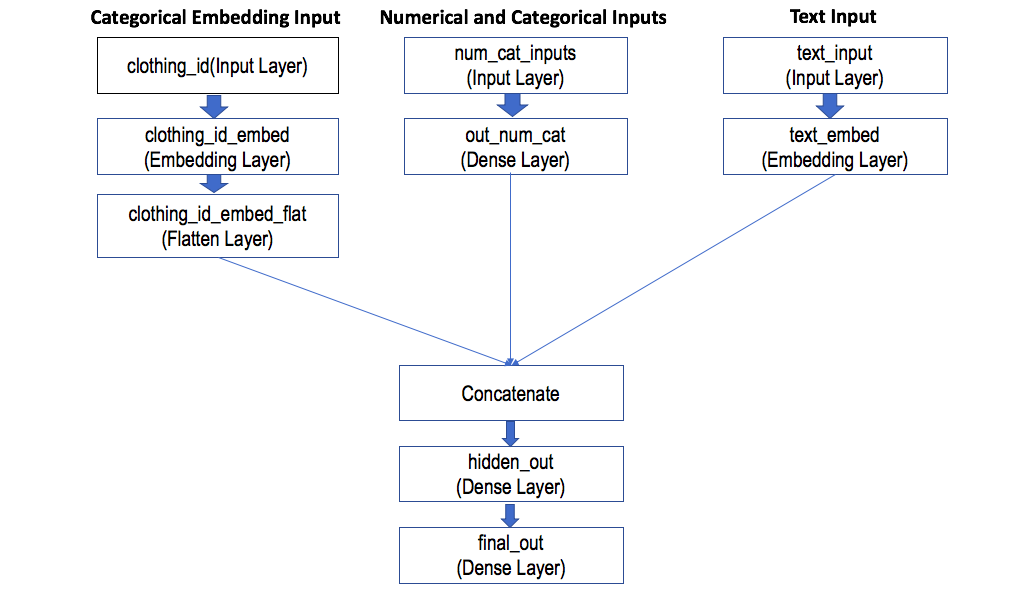

In [111]:
Image(filename='keras_func_api.png')